# Data Analysis on bank loans from Prosper
### Aaron Remski

The dataset used for this analysis has ~114,000 records containing data on bank loans from 2005-2014. It includes 81 features ranging from the borrower's credit grade to their stated monthly income.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows', 150) # to display all rows of df series
pd.options.display.float_format = '{:.4f}'.format # set it to convert scientific notation such 
# as 4.22510e+11 to 42251000462321.00

In [2]:
############################################################################
## (Un)Comment out if using a lighter background style in Jupyter
plt.style.use("dark_background")

In [3]:
# load data into pandas dataframe!
loanDF = pd.read_csv("prosperLoanData.csv")

In [4]:
sb.__version__

'0.11.2'

## Dataset Overview


In [5]:
# width & height
loanDF.shape

(113937, 81)

In [6]:
# review loanDF variables & identify features that require additional tidying/cleaning
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
# see sample of data
loanDF.sample(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
62504,30C53425579618634AEAC95,357130,2008-06-25 16:40:44.307000000,B,36,Chargedoff,2010-09-06 00:00:00,0.1538,0.1395,0.1295,NaN,NaN,NaN,NaN,NaN,NaN,3,IL,Executive,Self-employed,22.0000,False,False,NaN,2008-06-12 17:20:21.607000000,680.0000,699.0000,1998-05-03 00:00:00,7.0000,5.0000,12.0000,6,407.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,39394.0000,0.7900,10195.0000,12.0000,1.0000,0.0000,NaN,"$50,000-74,999",False,4250.0000,D211342583748709721ADF4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1403,26.0000,68,33768,9000,2008-07-07 00:00:00,Q3 2008,27C73422460015188DA55C2,307.3800,6409.9800,4715.4100,1694.5700,-121.4700,0.0000,4284.5900,4284.5900,0.0000,1.0000,0,0,0.0000,179
104942,93DA35919739907379160B6,961677,2013-10-04 16:50:31.440000000,NaN,60,Current,NaN,0.2890,0.2629,0.2529,0.2306,0.1275,0.1031,2.0000,E,4.0000,1,NY,NaN,Other,0.0000,False,False,NaN,2013-10-04 16:50:33,640.0000,659.0000,2001-03-28 00:00:00,12.0000,10.0000,21.0000,8,483.0000,0.0000,10.0000,1.0000,210.0000,0.0000,1.0000,0.0000,12179.0000,0.9600,274.0000,20.0000,0.9500,1.0000,0.3400,"$25,000-49,999",True,4000.0000,BE123694122697146CB4E40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,104730,4000,2013-10-09 00:00:00,Q4 2013,ECF53695624156429D9B974,120.4500,481.8000,131.7700,350.0300,-13.3100,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,24
65654,C051356119120527206A6B8,658997,2012-10-23 18:40:03.743000000,NaN,36,Current,NaN,0.1965,0.1599,0.1499,0.1417,0.0549,0.0868,5.0000,B,8.0000,1,IL,Professional,Employed,9.0000,True,False,NaN,2012-10-23 18:40:02,740.0000,759.0000,1984-11-01 00:00:00,3.0000,3.0000,10.0000,2,133.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,3435.0000,0.4900,3699.0000,9.0000,0.7000,0.0000,0.1200,"$50,000-74,999",True,5000.0000,6300366660387437820D1B7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77443,13500,2012-11-06 00:00:00,Q4 2012,977B3561421005188063FFB,474.5500,7474.5500,5229.4600,2245.0900,-140.4100,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,77
71966,EC9736020184508947BA65E,1187283,2014-02-04 16:28:59.630000000,NaN,36,Current,NaN,0.1632,0.1274,0.1174,0.1121,0.0424,0.0697,5.0000,B,6.0000,1,OH,Food Service Management,Employed,80.0000,False,False,NaN,2014-02-04 16:29:03,720.0000,739.0000,2000-08-31 00:00:00,11.0000,8.0000,26.0000,6,500.0000,1.0000,6.0000,0.0000,0.0000,1.0000,0.0000,0.0000,7430.0000,0.3000,16570.0000,25.0000,0.9600,1.0000,0.3400,"$50,000-74,999",True,4750.

## Structure of Dataset summarized
* ~114,000 records with 81 characteritics on completed, defaulted, current, & other types of bank loans. <br>
### Noteable Features
IncomeRange, CreditGrade, Term, LoanStatus, CloseDate, BorowerAPR, BorrowerRate,  LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, ExmploymentStatus, ExmploymentStatusDuration, ListingNumber, ListingCreationDate, 

## Assessing Dataset

* Roughly 20 features will be removed to clean dataset <br>
* 4 features/variables express dates, e.g. ListingCreationDate, ClosedDate, DateCreditPulled, LoanOriginationDate. Convert to datetime type<br>
* Several (variables)columns types need to be converted, e.g. CreditGrade, ProsperRating (Alpha), IncomeRange to the ordered categorical type<br>


In [8]:
##################### DELETE THIS CELL? ########################################################
# Columns to keep
keep = ['ListingNumber','ListingCreationDate','CreditGrade','Term','LoanStatus','CloseDate','BorrowerAPR','BorrowerRate',
    'LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)',
    'ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','ExmploymentStatus','ExmploymentStatusDuration']

In [9]:
# Columns to remove
remove = ['ListingKey', 'TotalTrades','TradesNeverDelinquent (percentage)', 'LoanKey','TotalProsperLoans','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPrincipalBorrowed',
          'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination',
          'LoanNumber','MemberKey']

## Data Cleaning
### Remove features that have too much data missing & provide no meaningful purpose in the present analysis.

In [10]:
# remove columns defined in 'remove' list to work with a roughly smaller dataframe
# show/verify remaining columns after removal

loanDF = loanDF.drop(remove, axis=1)
loanDF.columns

Index(['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCre

### Convert alpha columns into ordered categories

In [11]:
# This is where the ordinal_categories will be defined & converted
# convert CreditGrade, ProsperRating (Alpha), & IncomeRange to ordinal categorical types
# CreditGrade, & ProsperRating (Alpha): order assumed

ordinal_dict = {'CreditGrade': ['AA','A','B','C','D','E','HR'],
                    'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR'],
                    'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999',
                                   '$1-24,999','0','Not employed','Not displayed']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_dict[var])
    loanDF[var] = loanDF[var].astype(ordered_var)    

In [12]:
# confirm ordered categorical datatype converted
loanDF.CreditGrade.dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], ordered=True)

In [13]:
# confirm IncomeRange dtype converted
loanDF.IncomeRange.dtype

CategoricalDtype(categories=['$100,000+', '$75,000-99,999', '$50,000-74,999',
                  '$25,000-49,999', '$1-24,999', '0', 'Not employed',
                  'Not displayed'],
, ordered=True)

### Datatime type updates

In [14]:
# Convert type of date fields to datetime64[ns]

datecols = ['ListingCreationDate','ClosedDate','DateCreditPulled','LoanOriginationDate']

for datecol in datecols:
    loanDF[datecol] = pd.to_datetime(loanDF[datecol])

In [15]:
# Verify conversion successful
loanDF.ListingCreationDate.dtype

dtype('<M8[ns]')

In [16]:
# Verify conversion successful
loanDF.ListingCreationDate.dtype

dtype('<M8[ns]')

### Additional data cleaning considerations
1. Is there a consistent delta between the BorrowerRate & BorrowerAPR
2. The year should be removed from LoanOriginationQuarter 

### What time range on loans are we dealing with?

In [17]:
# get timeframe of loans
print("LoanOriginationDate: \n")
print(f"Earliest Loan Origination Date: {loanDF.LoanOriginationDate.min()}")
print(f"Latest Loan Origination Date: {loanDF.LoanOriginationDate.max()}\n\n")

print("ListingCreationDate: \n")
print(f"Earliest Listing Creation Date: {loanDF.ListingCreationDate.min()}")
print(f"Latest Listing Creation Date: {loanDF.ListingCreationDate.max()}\n\n")

print("ClosedDate: \n")
print(f"Earliest Closed Date: {loanDF.ClosedDate.min()}")
print(f"Latest Closed Date: {loanDF.ClosedDate.max()}\n\n")

print("DateCreditPulled: \n")
print(f"Earliest Date Credit Pulled: {loanDF.DateCreditPulled.min()}")
print(f"Latest Date Credit Pulled: {loanDF.DateCreditPulled.max()}\n\n")



LoanOriginationDate: 

Earliest Loan Origination Date: 2005-11-15 00:00:00
Latest Loan Origination Date: 2014-03-12 00:00:00


ListingCreationDate: 

Earliest Listing Creation Date: 2005-11-09 20:44:28.847000
Latest Listing Creation Date: 2014-03-10 12:20:53.760000


ClosedDate: 

Earliest Closed Date: 2005-11-25 00:00:00
Latest Closed Date: 2014-03-10 00:00:00


DateCreditPulled: 

Earliest Date Credit Pulled: 2005-11-09 00:30:04.487000
Latest Date Credit Pulled: 2014-03-10 12:20:56




### 2018 SOC (Standard Occupational Classification)
Add additional categorization of loanee occupations using (ISCO-08), 

In [18]:
socDF = pd.read_csv("ISCO-08.csv")
socDF.head(5)

,Prosper Occupation,Number of Loans,ILOSTAT Major Group Name,ILOSTAT Major Group,Minor Group
0,Accountant/CPA,3233,Business-Financial,Business & Financial Operations Occupations,Finance
1,Administrative Assistant,3688,Business-Financial,Business & Financial Operations Occupations,Administrative
2,Analyst,3602,Business-Financial,Business & Financial Operations Occupations,Scientist
3,Architect,213,Architect. & Engineer.,Architecture & Engineering Occupations,Architect
4,Attorney,1046,Legal Occup.,Legal Occupations,Lawyers


In [19]:
# The major group will be added to LoanDF to reduce & generalize occupations
socDF['ILOSTAT Major Group'].value_counts()

Community and Social Service Occupations              17
Business & Financial Operations Occupations            8
Construction & Extraction Occupations                  7
Healthcare Practitioners and Technical Occupations     7
Government - Local, State, Federal                     5
Architecture & Engineering Occupations                 4
Transportation & Material Moving Occupations           4
Sales and Related Occupations                          4
Life, Physical, & Social Science Occupations           3
Food Preparation & Serving Related Occupations         3
Legal Occupations                                      1
Computer & Mathematical Occupations                    1
Family                                                 1
Building & Grounds Maintenance                         1
Other                                                  1
Name: ILOSTAT Major Group, dtype: int64

## Univariate Analysis - source ILOSTAT Value Counts 

In [20]:
# remove irrelevant data 
socDF.drop('Number of Loans', axis=1, inplace=True)
socDF.head(1)

,Prosper Occupation,ILOSTAT Major Group Name,ILOSTAT Major Group,Minor Group
0,Accountant/CPA,Business-Financial,Business & Financial Operations Occupations,Finance


In [21]:
# rename column to match loanDF column name
socDF = socDF.rename(columns={'Prosper Occupation':'Occupation'})
socDF.head(2)

,Occupation,ILOSTAT Major Group Name,ILOSTAT Major Group,Minor Group
0,Accountant/CPA,Business-Financial,Business & Financial Operations Occupations,Finance
1,Administrative Assistant,Business-Financial,Business & Financial Operations Occupations,Administrative


In [22]:
# Add socDF Major & Minor groups to loanDF where relevant & verify with sample
loanDF = pd.merge(loanDF, socDF, on='Occupation')
loanDF.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group Name,ILOSTAT Major Group,Minor Group
89050,605957,2012-06-29 11:22:31.783,NaN,36,Current,NaT,0.3305,0.2909,0.2809,0.2681,0.1425,0.1256,2.0000,E,6.0000,3,OH,Realtor,Employed,36.0000,True,False,NaN,2012-08-18 05:51:39,660.0000,679.0000,2005-01-31 00:00:00,15.0000,11.0000,27.0000,7,257.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8162.0000,0.6500,4263.0000,4.0000,0.2000,"$25,000-49,999",True,3750.0000,NaN,4000,2012-08-29,Q3 2012,167.8200,3005.7600,1556.5400,1449.2200,-49.8200,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,11,Sales-Related,Sales and Related Occupations,Sales
62405,665822,2012-11-07 11:40:44.937,NaN,36,Current,NaT,0.1965,0.1599,0.1499,0.1417,0.0549,0.0868,5.0000,B,10.0000,18,CO,Sales - Commission,Employed,22.0000,False,False,NaN,2012-11-07 11:40:42,700.0000,719.0000,1991-09-01 00:00:00,9.0000,8.0000,19.0000,8,515.0000,0.0000,2.0000,1.0000,0.0000,0.0000,0.0000,0.0000,11913.0000,0.6900,4987.0000,0.0000,0.0700,"$100,000+",True,9583.3333,NaN,4000,2012-11-16,Q4 2012,140.6100,2109.1500,1438.8100,670.3400,-41.9100,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,60,Sales-Related,Sales and Related Occupations,Sales
17447,545430,2011-12-19 15:06:00.657,NaN,36,Completed,2012-08-17,0.1736,0.1449,0.1349,0.1326,0.0595,0.0731,5.0000,B,8.0000,14,NC,Other,Employed,44.0000,False,False,NaN,2011-12-19 15:05:55,680.0000,699.0000,1998-10-29 00:00:00,4.0000,3.0000,8.0000,1,25.0000,2.0000,3.0000,0.0000,0.0000,1.0000,0.0000,0.0000,95.0000,0.1300,605.0000,0.0000,0.1800,"$50,000-74,999",True,4750.0000,NaN,11000,2012-01-24,Q1 2012,378.5800,11883.0400,11000.0000,883.0400,-57.0200,-257.4300,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,47,Other,Other,Other


# This analysis will explore:
1. What are some common characteristics of 'successful' (completed) vs 'failed' (defaulted & chargedoff) loans?
2. Are there any surprising characteristics of 'successful' vs. 'failed' loans?
3. Do some of the expected/obvious value relationships check out for 'Successful' & 'Failed' loans? 
    a. higher credit scores correlate for successful & vice versa
    b. lower debt to income ratio for successful & vice versa
    c. higher IncomeRange for successful & vice versa

4. Add occupation & ISOC-08 categorization as a third feature for multivariant plots

## Features in the dataset that will help support the investigation
1. LoanStatus
2. ListingCategory (numeric)
3. LoanOriginalAmount
4. IncomeRange
5. BorrowerRate
6. StatedMonthlyIncome
7. DebtToIncomeRatio
8. ProsperRating (alpha)
9. CreditGrade
10. PastDue (lengths)
11. CreditScoreRangeUpper
12. MonthlyLoanPayment

### END of Preliminary Data Wrangling
# START of Exploration

In [23]:
loanDF['LoanStatus'].value_counts()

Current                   54968
Completed                 36517
Chargedoff                11641
Defaulted                  4482
Past Due (1-15 days)        796
Past Due (31-60 days)       355
Past Due (61-90 days)       311
Past Due (91-120 days)      302
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     2
Name: LoanStatus, dtype: int64

## Univariate Analysis - LoanStatus Value Counts
* There are approximately 110,000 total records
* 50% of those loans are active and good standing
* 33% of those loans are completely paid off (SUCCESSFUL)
* 15% of those loans were defaulted or chargedoff (FAILED)
* The remaining 2% are past due

In [24]:
# Function to add additional column to dataframe to use as a hue
def SucFail(status):
    if status == 'Defaulted' or status == 'Chargedoff':
        return("Failed")
    if status == 'Completed':
        return("Successful")
    if status == 'Current':
        return("Current")

In [25]:
# See how the failed loans shook out categorically
# UndefinedVariableError: name 'loanstatus_lst' is not defined

loanstatus_lst = ['Current','Completed','Chargedoff','Defaulted']
loanDF_SF = loanDF.copy()
loanDF_SF = loanDF_SF.loc[loanDF_SF['LoanStatus'].isin(loanstatus_lst)] 

#loanDF_loanstatus_lst.sample(10)
# sb.displot(data=loanDF_loanstatus, x="LoanStatus", col="ILOSTAT Major Group", col_wrap=3, height=5);

#sns.displot(penguins, x="flipper_length_mm", hue="species")

#sb.displot(loanDF_loanstatus, x="


In [26]:
# create new DF with new column to categorize loans as SUCCESSFUL or FAILED
# a new dataframe is necessary because an additional column is being created OR there's an easier way to do this by 
# filtering the data WHILE PLOTTING... I see how the later is preferred. 

loanDF_SF['successfail'] = loanDF_SF.apply(lambda row: SucFail(row['LoanStatus']), axis=1)

In [27]:
loanDF_SF.sample(5)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group Name,ILOSTAT Major Group,Minor Group,successfail
51742,965438,2013-10-23 04:18:56.067,NaN,60,Current,NaT,0.2291,0.2045,0.1945,0.1797,0.0899,0.0898,4.0000,C,4.0000,1,OH,Sales - Retail,Employed,93.0000,True,False,NaN,2013-10-23 04:18:56.000,660.0000,679.0000,1995-11-10 00:00:00,7.0000,7.0000,27.0000,5,215.0000,1.0000,3.0000,0.0000,0.0000,31.0000,1.0000,0.0000,3671.0000,0.8700,157.0000,1.0000,0.2600,"$25,000-49,999",True,3500.0000,NaN,10000,2013-10-31,Q4 2013,267.4500,1069.8000,407.1600,662.6400,-32.4100,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,47,Sales-Related,Sales and Related Occupations,Sales,Current
6314,1006866,2013-10-26 12:49:56.210,NaN,36,Current,NaT,0.3018,0.2629,0.2529,0.2306,0.1275,0.1031,2.0000,E,2.0000,1,CA,Other,Employed,265.0000,False,False,NaN,2013-10-15 11:13:23.000,700.0000,719.0000,1993-03-01 00:00:00,17.0000,15.0000,34.0000,13,594.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6182.0000,0.3900,7864.0000,2.0000,0.4800,"$50,000-74,999",True,5000.0000,NaN,7000,2013-10-30,Q4 2013,283.1200,1132.4800,539.2200,593.2600,-22.5700,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,62,Other,Other,Other,Current
66751,525878,2011-09-07 17:54:01.113,NaN,36,Chargedoff,2013-08-21,0.3564,0.3199,0.3099,0.2957,0.1470,0.1487,2.0000,E,4.0000,1,NY,Retail Management,Employed,106.0000,False,False,NaN,2011-08-14 21:40:27.000,660.0000,679.0000,2006-11-24 00:00:00,4.0000,4.0000,8.0000,5,120.0000,5.0000,10.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5017.0000,0.6500,2683.0000,0.0000,0.1400,"$25,000-49,999",True,2875.0000,NaN,6500,2011-09-21,Q3 2011,283.0700,5157.1900,2193.0300,2964.1600,-79.0600,-76.5000,4306.9700,4306.9700,0.0000,1.0000,0,0,0.0000,106,Business-Financial,Business & Financial Operations Occupations,Management,Failed
106671,109118,2007-03-09 19:09:41.700,A,36,Completed,2010-01-12,0.1181,0.1006,0.0956,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Bus Driver,Full-time,1.0000,True,False,NaN,2007-02-18 14:21:41.690,720.0000,739.0000,1988-02-01 00:00:00,12.0000,12.0000,34.0000,11,1647.0000,2.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,167490.0000,0.6000,110560.0000,0.0000,0.9500,"$1-24,999",True,1762.0000,NaN,1000,2007-03-23,Q1 2007,32.3000,1162.1400,1000.0000,162.1400,-8.0600,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,47,Transport-Material Mvng,Transportation & Material Moving Occupations,Skilled Labor,Successful
24249,434083,2009-11-18 10:07:56.467,NaN,36,Chargedoff,2010-12-30,0.1352,0.1140,0.1040,0.0827,0.0210,0.0827,6.0000,A,9.0000,7,MN,Other,Full-time,103.0000,True,False,NaN,2009-11-18 10:03:00.000,740.0000,759.0000,1998-01-16 00:00:00,15.0000,15.0000,25.0000,13,553.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,30999.0000,0.4200,41501.0000,1.0000,0.2700,"$25,000-49,999",True,3083.

In [28]:
# create new DF for all Successful loans
successful = loanDF_SF.query('LoanStatus == "Completed"').copy()
current = loanDF_SF.query('LoanStatus == "Current"')
successful.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group Name,ILOSTAT Major Group,Minor Group,successfail
48227,48560,2006-10-15 11:36:13.910,A,36,Completed,2009-10-25,0.1762,0.1690,0.1615,NaN,NaN,NaN,NaN,NaN,NaN,0,CA,Executive,Not available,NaN,True,True,908F3366151703547ACB706,2006-10-15 11:26:11.500,720.0000,739.0000,1984-01-01 00:00:00,NaN,NaN,34.0000,12,2702.0000,5.0000,11.0000,0.0000,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,0.4700,Not displayed,True,9000.0000,NaN,10000,2006-10-25,Q4 2006,352.5600,12778.8200,10000.0000,2778.8200,-83.4500,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,74,Business-Financial,Business & Financial Operations Occupations,Executive,Successful
107697,455363,2010-04-21 08:04:07.033,NaN,36,Completed,2013-04-27,0.1130,0.0920,0.0820,0.0608,0.0210,0.0608,6.0000,A,10.0000,5,MD,Student - College Senior,Part-time,6.0000,False,False,NaN,2010-04-21 07:59:54.000,700.0000,719.0000,2005-05-25 00:00:00,5.0000,5.0000,13.0000,4,111.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7183.0000,0.3800,11417.0000,0.0000,0.2000,"$1-24,999",True,1750.0000,NaN,2000,2010-04-27,Q2 2010,0.0000,2296.8100,2000.0000,296.8100,-32.2700,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,56,Comm-Soc Serv,Community and Social Service Occupations,Student,Successful
94379,528769,2011-09-22 08:31:38.413,NaN,36,Completed,2012-06-05,0.3053,0.2699,0.2599,0.2534,0.1120,0.1414,3.0000,D,6.0000,1,WA,Administrative Assistant,Employed,38.0000,False,False,NaN,2011-09-16 11:10:18.000,640.0000,659.0000,2000-11-15 00:00:00,20.0000,17.0000,32.0000,17,724.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,29591.0000,0.7500,7652.0000,0.0000,0.2900,"$50,000-74,999",True,4750.0000,NaN,10000,2011-09-30,Q3 2011,408.2000,11608.6900,10000.0000,1608.6900,-53.0500,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,93,Business-Financial,Business & Financial Operations Occupations,Administrative,Successful


In [29]:
# make dataframe for failed loans 
failed = loanDF_SF.query('LoanStatus == "Defaulted" or LoanStatus == "Chargedoff"').copy()
failed.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group Name,ILOSTAT Major Group,Minor Group,successfail
36008,309970,2008-04-14 06:27:16.947,E,36,Chargedoff,2010-03-30,0.3745,0.3500,0.3400,NaN,NaN,NaN,NaN,NaN,NaN,7,CA,Professional,Full-time,2.0000,False,False,NaN,2008-04-08 09:08:17.007,580.0000,599.0000,1997-12-15 00:00:00,4.0000,4.0000,18.0000,2,182.0000,2.0000,16.0000,2.0000,1589.0000,14.0000,0.0000,0.0000,3582.0000,0.2800,1857.0000,1.0000,0.4300,"$25,000-49,999",True,2500.0000,NaN,2551,2008-04-29,Q2 2008,115.4000,2077.2000,908.0000,1169.2000,-32.5500,-39.2400,1642.9800,1643.0000,0.0000,1.0000,1,0,0.0000,6,Business-Financial,Business & Financial Operations Occupations,Skilled Labor,Failed
22850,124614,2007-04-16 22:46:15.387,B,36,Defaulted,2008-02-28,0.2252,0.2178,0.2078,NaN,NaN,NaN,NaN,NaN,NaN,0,MI,Other,Self-employed,65.0000,True,True,839133853968859510E09E1,2007-04-16 22:24:39.397,700.0000,719.0000,1994-01-01 00:00:00,7.0000,5.0000,14.0000,3,802.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,100827.0000,0.8900,12001.0000,0.0000,10.0100,"$1-24,999",False,0.0833,NaN,25000,2007-04-30,Q2 2007,951.9200,4729.6000,2205.0800,2524.5200,-115.2200,0.0000,22794.9000,22794.9200,0.0000,1.0000,0,0,0.0000,281,Other,Other,Other,Failed
35922,53053,2006-10-25 10:33:30.670,HR,36,Defaulted,2007-08-30,0.2997,0.2900,0.2650,NaN,NaN,NaN,NaN,NaN,NaN,0,OR,Professional,Not available,NaN,True,True,DD17336621690487632377B,2006-10-11 13:55:26.433,480.0000,499.0000,1993-07-18 00:00:00,NaN,NaN,22.0000,2,38.0000,8.0000,21.0000,2.0000,NaN,1.0000,2.0000,NaN,NaN,NaN,NaN,NaN,0.3000,Not displayed,True,1600.0000,NaN,2000,2006-11-01,Q4 2006,83.8100,388.1000,167.8000,220.3000,-3.9900,0.0000,1832.2000,1832.2000,53.4900,1.0000,0,0,0.0000,14,Business-Financial,Business & Financial Operations Occupations,Skilled Labor,Failed


### Clean Outliers in SUCCESSFULL & FAILED Dataframes

In [30]:
successful.query("CreditScoreRangeUpper < 300")["CreditScoreRangeUpper"].value_counts()

19.0000    29
Name: CreditScoreRangeUpper, dtype: int64

In [31]:
successful.drop(successful.query("CreditScoreRangeUpper == 19").index, inplace = True)

In [32]:
failed.query("CreditScoreRangeUpper < 400")["CreditScoreRangeUpper"].value_counts()

19.0000     72
379.0000     1
Name: CreditScoreRangeUpper, dtype: int64

In [33]:
# drop records with super low CreditScore
failed.drop(failed.query("CreditScoreRangeUpper == 19").index, inplace = True) 

In [34]:
# Loan status totals
print(f"Total for all loans:\t\t${loanDF.LoanOriginalAmount.sum()}")
print(f"Total for all successful loans:\t${successful['LoanOriginalAmount'].sum()}")
#print(f"Total value of all past due loans:\t$  {all_past.LoanOriginalAmount.sum()}") 
print(f"Total for all failed loans:\t${failed.LoanOriginalAmount.sum()}")

Total for all loans:		$925315499
Total for all successful loans:	$228291748
Total for all failed loans:	$105089189


In [35]:
successful[successful['LoanOriginalAmount'] > 20001]['ListingNumber'].count()

894

In [36]:
loanDF['ILOSTAT Major Group'].value_counts()

Business & Financial Operations Occupations           34442
Other                                                 28617
Community and Social Service Occupations               8688
Construction & Extraction Occupations                  7781
Sales and Related Occupations                          6966
Healthcare Practitioners and Technical Occupations     4916
Computer & Mathematical Occupations                    4478
Government - Local, State, Federal                     3845
Architecture & Engineering Occupations                 2969
Food Preparation & Serving Related Occupations         2798
Transportation & Material Moving Occupations           2313
Legal Occupations                                      1046
Life, Physical, & Social Science Occupations            642
Building & Grounds Maintenance                          236
Family                                                  120
Name: ILOSTAT Major Group, dtype: int64

## 2018 SOC - ILOSTAT Major Group loan distribution numbers
* Business & Financial Operations Occupations & "Other" make up 50% of ALL loans made by Prosper
* Tiniest categories include:
    1. Family
    2. Building & Grounds Maintenance
    3. Life, Physical, & Social Science Occupations
    4. Legal Occupations

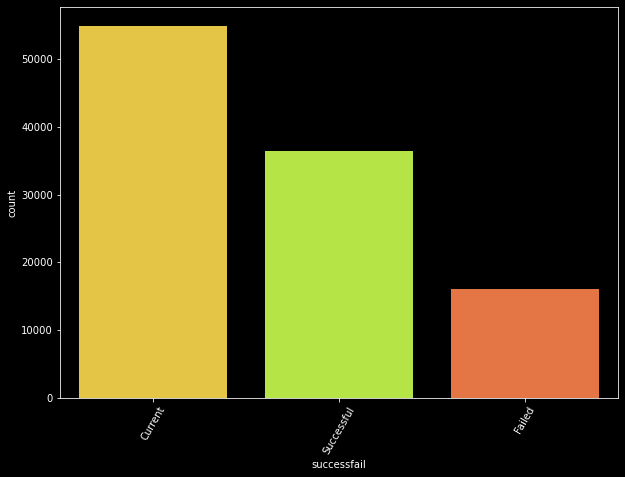

In [37]:
# Visualize LoanStatus distribution

# Colors obtained from https://htmlcolorcodes.com/color-picker/
# #FF5733 - Red
# Tetradic scheme
# 
# #2AFFA8 - wild green [successful]
# #EBFF2A - neon yellow [current]
# #FF2A81 - neon pink [failed]

# #FF6B2A - red orange [failed]
# #FFD52A - lite orange [current]
# #BEFF2A - lite green [successful]

fig = plt.figure(figsize=[10,7])
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])
ax.tick_params(axis='x', rotation=60)
sb.countplot(data=loanDF_SF, x='successfail', order=loanDF_SF.successfail.value_counts().index, palette=['#FFD52A','#BEFF2A', '#FF6B2A']);

  #sns.countplot(x = df['Dependent'], palette=['#432371',"#FAAE7B"]);

## Univariate Countplot - LoanStatus
* As expected the majority of the bank loans are either current(good standing) or completed. 
* It's surprising to see the number of ChargedOffs & Defaulted loans.<br/>
* Further analysis of failed loans (ChargedOff & Defaulted) & successful loans (Completed) will follow


In [70]:
#ILO_totals = loanDF_SF["ILOSTAT Major Group Name"].value_counts()
ILO_totals = loanDF_SF.groupby("ILOSTAT Major Group Name")["LoanStatus"].value_counts()
#loanDF_SF.groupby("LoanStatus")["last_name"].count()

In [95]:
for ea in ILO_totals.iteritems():
    print(ea[1])

1514
1114
223
68
129
74
28
4
17245
11816
3279
1405
4346
2977
848
341
2073
1907
314
107
4276
2067
943
352
49
34
24
10
1452
788
384
115
1812
1440
380
142
2974
1282
393
161
603
384
36
13
311
267
46
9
13919
9315
3459
1281
3117
2266
1038
389
1329
605
246
85


In [92]:
for ea in ILO_totals.iteritems():
    comp = ea[0][1]
    print(ea[0])

('Architect. & Engineer.', 'Current')
('Architect. & Engineer.', 'Completed')
('Architect. & Engineer.', 'Chargedoff')
('Architect. & Engineer.', 'Defaulted')
('Bldg-Grnds Maint', 'Current')
('Bldg-Grnds Maint', 'Completed')
('Bldg-Grnds Maint', 'Chargedoff')
('Bldg-Grnds Maint', 'Defaulted')
('Business-Financial', 'Current')
('Business-Financial', 'Completed')
('Business-Financial', 'Chargedoff')
('Business-Financial', 'Defaulted')
('Comm-Soc Serv', 'Current')
('Comm-Soc Serv', 'Completed')
('Comm-Soc Serv', 'Chargedoff')
('Comm-Soc Serv', 'Defaulted')
('Computer-Math', 'Completed')
('Computer-Math', 'Current')
('Computer-Math', 'Chargedoff')
('Computer-Math', 'Defaulted')
('Construct-Extract', 'Current')
('Construct-Extract', 'Completed')
('Construct-Extract', 'Chargedoff')
('Construct-Extract', 'Defaulted')
('Family ', 'Completed')
('Family ', 'Current')
('Family ', 'Chargedoff')
('Family ', 'Defaulted')
('Food Prep-Serv', 'Current')
('Food Prep-Serv', 'Completed')
('Food Prep-Serv'

In [90]:
for ea in ILO_totals.iteritems():
    if ea[0]

(('Architect. & Engineer.', 'Current'), 1514)
(('Architect. & Engineer.', 'Completed'), 1114)
(('Architect. & Engineer.', 'Chargedoff'), 223)
(('Architect. & Engineer.', 'Defaulted'), 68)
(('Bldg-Grnds Maint', 'Current'), 129)
(('Bldg-Grnds Maint', 'Completed'), 74)
(('Bldg-Grnds Maint', 'Chargedoff'), 28)
(('Bldg-Grnds Maint', 'Defaulted'), 4)
(('Business-Financial', 'Current'), 17245)
(('Business-Financial', 'Completed'), 11816)
(('Business-Financial', 'Chargedoff'), 3279)
(('Business-Financial', 'Defaulted'), 1405)
(('Comm-Soc Serv', 'Current'), 4346)
(('Comm-Soc Serv', 'Completed'), 2977)
(('Comm-Soc Serv', 'Chargedoff'), 848)
(('Comm-Soc Serv', 'Defaulted'), 341)
(('Computer-Math', 'Completed'), 2073)
(('Computer-Math', 'Current'), 1907)
(('Computer-Math', 'Chargedoff'), 314)
(('Computer-Math', 'Defaulted'), 107)
(('Construct-Extract', 'Current'), 4276)
(('Construct-Extract', 'Completed'), 2067)
(('Construct-Extract', 'Chargedoff'), 943)
(('Construct-Extract', 'Defaulted'), 352)
(

In [71]:
for occup in ILO_totals:
    print(occ

1514
1114
223
68
129
74
28
4
17245
11816
3279
1405
4346
2977
848
341
2073
1907
314
107
4276
2067
943
352
49
34
24
10
1452
788
384
115
1812
1440
380
142
2974
1282
393
161
603
384
36
13
311
267
46
9
13919
9315
3459
1281
3117
2266
1038
389
1329
605
246
85


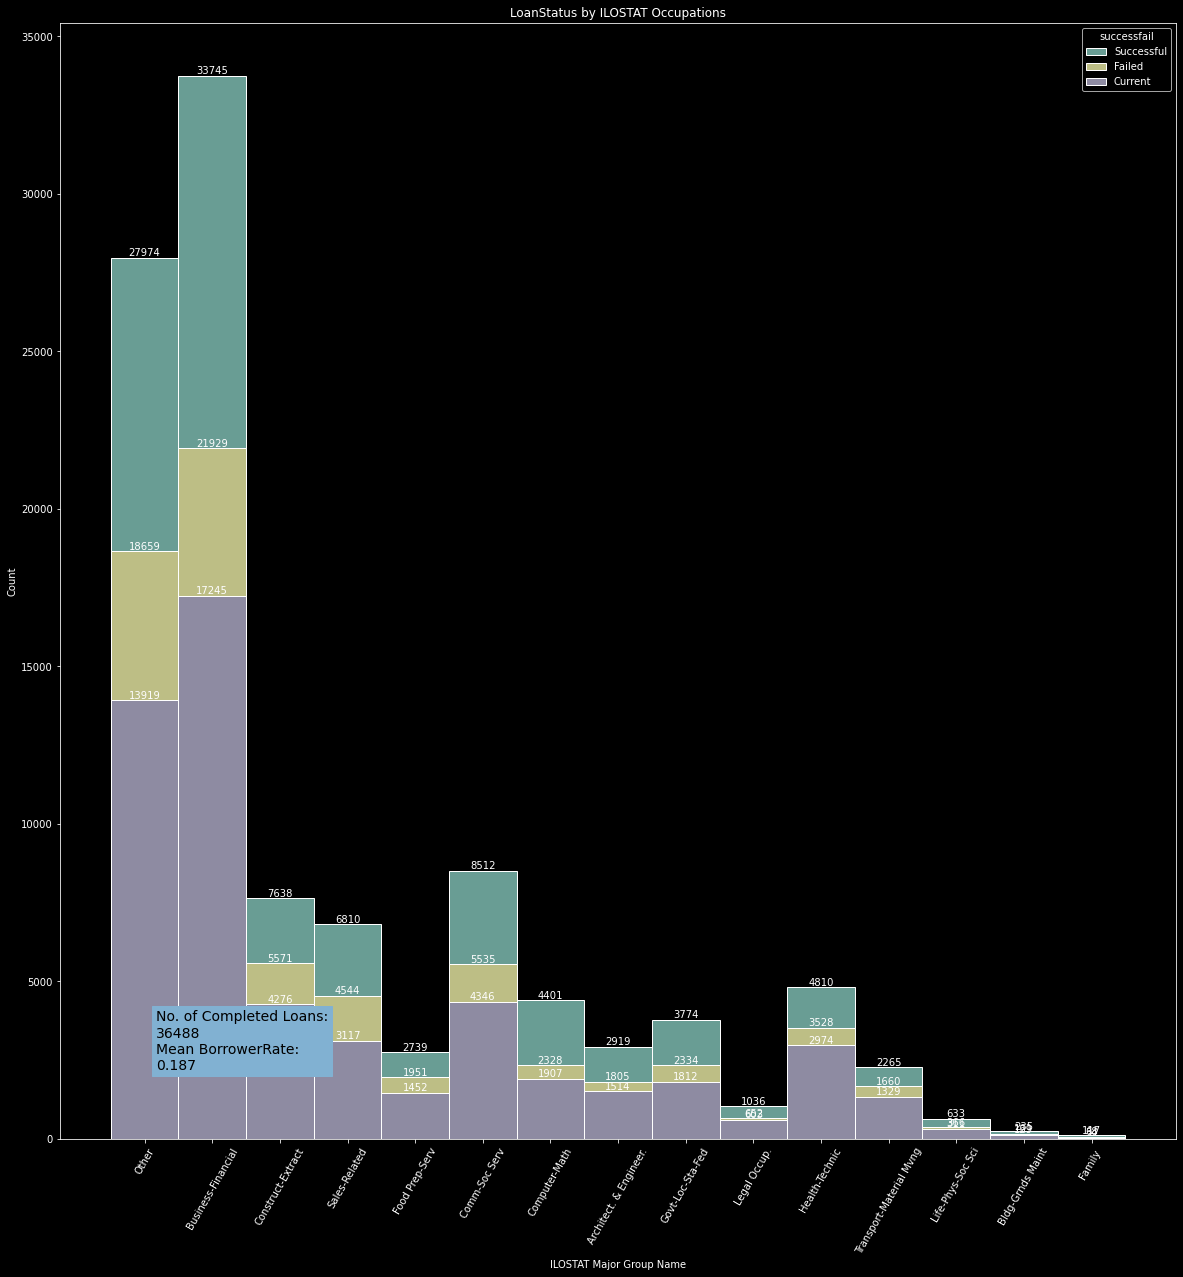

In [57]:




fig = plt.figure(figsize=[20,20])
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])
ax.tick_params(axis='x', rotation=60)

#res = [ele for ele in test_list if(ele in test_string)]

#failed_no = "No. of Loans:\n" + str(loanDF.ListingNumber.count()) + "\n"
#failed_mean = "Fail Ratio:\n" + str(round(successful.BorrowerRate.mean(),3))

style = dict(size=14, color='black', backgroundcolor=sb.color_palette()[4])
ax.set_title("LoanStatus by ILOSTAT Occupations")
ax.text(0.17,2200,completed_no + completed_mean, **style)

sb.histplot(data=loanDF_SF, x="ILOSTAT Major Group Name",  hue="successfail", multiple="stack")

for container in ax.containers:
    ax.bar_label(container)

In [59]:
#for container in ax.containers:
#    ax.bar_label(container)
    
for container in ax.containers:
    for bar in container:
        print(bar)
        

Rectangle(xy=(-0.5, 0), width=1, height=13919, angle=0)
Rectangle(xy=(0.5, 0), width=1, height=17245, angle=0)
Rectangle(xy=(1.5, 0), width=1, height=4276, angle=0)
Rectangle(xy=(2.5, 0), width=1, height=3117, angle=0)
Rectangle(xy=(3.5, 0), width=1, height=1452, angle=0)
Rectangle(xy=(4.5, 0), width=1, height=4346, angle=0)
Rectangle(xy=(5.5, 0), width=1, height=1907, angle=0)
Rectangle(xy=(6.5, 0), width=1, height=1514, angle=0)
Rectangle(xy=(7.5, 0), width=1, height=1812, angle=0)
Rectangle(xy=(8.5, 0), width=1, height=603, angle=0)
Rectangle(xy=(9.5, 0), width=1, height=2974, angle=0)
Rectangle(xy=(10.5, 0), width=1, height=1329, angle=0)
Rectangle(xy=(11.5, 0), width=1, height=311, angle=0)
Rectangle(xy=(12.5, 0), width=1, height=129, angle=0)
Rectangle(xy=(13.5, 0), width=1, height=34, angle=0)
Rectangle(xy=(-0.5, 13919), width=1, height=4740, angle=0)
Rectangle(xy=(0.5, 17245), width=1, height=4684, angle=0)
Rectangle(xy=(1.5, 4276), width=1, height=1295, angle=0)
Rectangle(xy=(

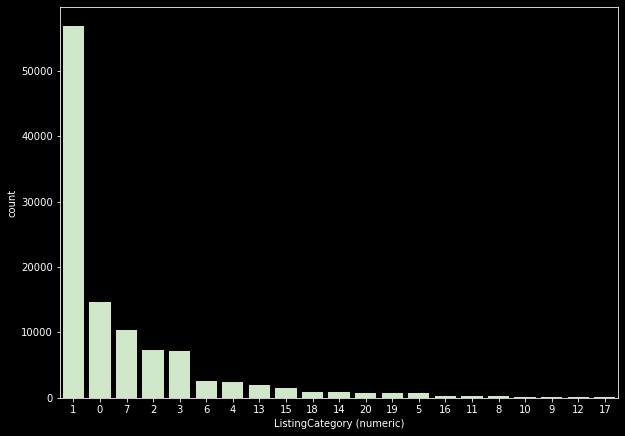

In [39]:
# see distribution of data on ListingCategory (numeric)
fig = plt.figure(figsize=[10,7])
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])
base_color = sb.color_palette()[8]
sb.countplot(data=loanDF, x='ListingCategory (numeric)', color=base_color, order=loanDF['ListingCategory (numeric)'].value_counts().index);
#plt.xlim(1,15)
#plt.xticks(rotation=75);

## Countplot - ListingCategory (numeric)

> This is the break down of categories. 

>1-Debt Consolidation - OVERWHELMINGLY accounts for majority of loans<br/>
>0-Not Avail. <br/>
>7-other<br/>
>2-Home Improvement<br/>
>3-Business<br/>
>6-Auto<br/>

The category of the listing that the borrower selected when posting their listing: <br/><br/>
*0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement,* <br/>
*3 - Business, 4 - Personal Loan*, 5 - Student Use, <br/>
*6 - Auto, 7- Other*, 8 - Baby&Adoption, 9 - Boat, <br/>
10 - Cosmetic Procedure, 11 - Engagement Ring, <br/>
12 - Green Loans, *13 - Household Expenses*, 14 - Large Purchases, <br/>
*15 - Medical/Dental*, 16 - Motorcycle, 17 - RV, <br/>
*18 - Taxes*, 19 - Vacation, 20 - Wedding Loans <br/>

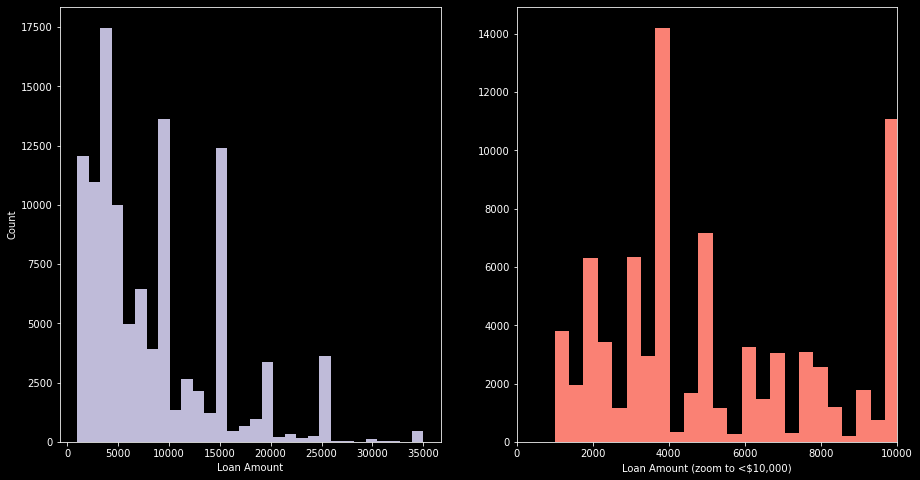

In [40]:
plt.figure(figsize=[15,8])
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
plt.subplot(1,2,1)
#plt.set_title("All loans")
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.hist(data=loanDF, x='LoanOriginalAmount', bins=30, color=sb.color_palette()[2]);

plt.subplot(1,2,2)
#plt.set_title("Loans <= $5000")
plt.xlabel('Loan Amount (zoom to <$10,000)')
plt.hist(data=loanDF, x='LoanOriginalAmount', bins=90, color=sb.color_palette()[3]);
plt.xlim(0,10000);


## Histogram analysis - LoanOriginalAmount
* `$`4000 loan is the most prevalent loan amount. Additionally, loan amounts fall in `$`5,000 increments with the highest loans no greater than `$`35,000<br>
* The majority of loans <= than `$`15000<br>
* Nearly half of all Prosper loans are <= `$`5000. What distinguishes these loans from the others?
* Investigate the `$`4000 loans<br>
* There is a right-skew.<br>

In [41]:
loanDF.query("LoanOriginalAmount <= 5000")['LoanOriginalAmount'].describe()

count   49223.0000
mean     3280.4025
std      1190.2072
min      1000.0000
25%      2300.0000
50%      3500.0000
75%      4000.0000
max      5000.0000
Name: LoanOriginalAmount, dtype: float64

## Percentile & number analysis - LoanOriginalAmount
* `$`4000 loan is the most prevalent loan amount. Additionally, loan amounts fall in `$`5,000 increments with the highest loans no greater than `$`35,000<br>
* The majority of loans <= than `$`15000<br>
* Nearly half of all Prosper loans are <= `$`5000. What distinguishes these loans from the others?
* Investigate the `$`4000 loans<br>
* There is a right-skew.<br>

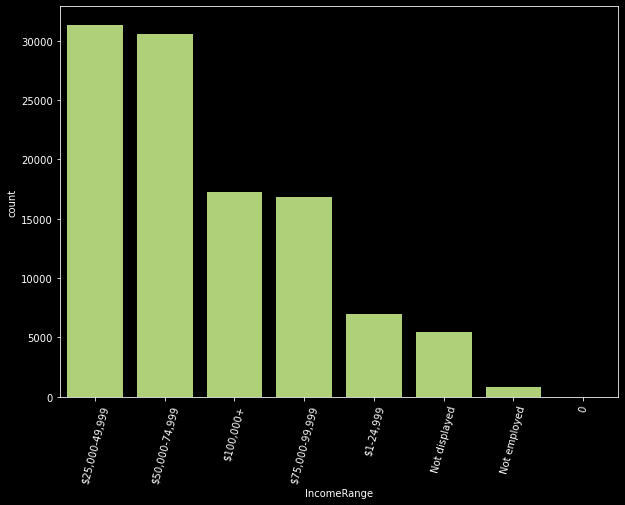

In [42]:
# see distribution of data on IncomeRange
fig = plt.figure(figsize=[10,7])
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])

base_color = sb.color_palette()[6]
sb.countplot(data=loanDF, x='IncomeRange', color=base_color, order=loanDF.IncomeRange.value_counts().index)
plt.xticks(rotation=75);

## Histogram Analysis - IncomeRange
* Roughly the same number of loans represented for IncomeRange 75k-100k and 100k+, 17k records total
* Roughly the same number of loans represented for IncomeRange 25k-50k and 50k-75k, 32k records total
* Additional visuals will be using IncomeRange below

<Figure size 720x504 with 0 Axes>

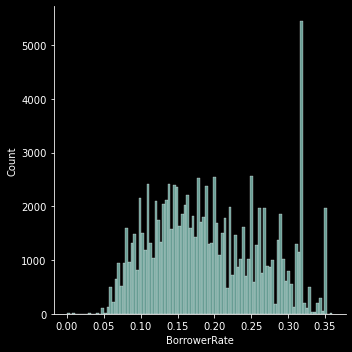

In [43]:
# Univarite exploration of BorrowerAPR
plt.figure(figsize=[10,7])

sb.displot(loanDF['BorrowerRate'], bins=100);

## Histogram Analysis - BorrowerRate
* It appears there is a fairly normal distribution of varying BorrowerRates excluding 0.32. 
* There is a significant spike in distrubtion around 0.32 & 0.35


In [44]:
# What is going on with the interest rate around 0.36? Why are there so many loans with this percentage
rate3133 = loanDF.query('BorrowerRate >= 0.31 and BorrowerRate <= 0.33')
rate3133.shape

(7826, 68)

(0.314, 0.325)

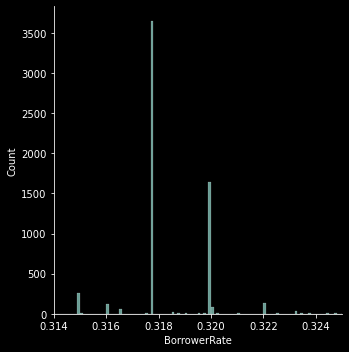

In [45]:
# Univarite exploration of BorrowerAPR plt.xlim(0,10000);
# plt.figure(figsize=[25,18])
sb.displot(rate3133['BorrowerRate'], bins=200);
plt.xlim(0.3140,0.325)

## Histogram Analysis - BorrowerRate xlimits 0.31<-->0.33
* >3500 loans @ 0.3175  >1500 @ 0.32

## Descriptive Statistics - StatedMonthlyIncome

In [46]:
# explore breakdown of Monthly Incomes
pd.set_option('display.float_format', str)
loanDF['StatedMonthlyIncome'] = loanDF['StatedMonthlyIncome'].astype(np.int64)
loanDF['StatedMonthlyIncome'].describe()

count             109857.0
mean    5646.9412964126095
std      7582.718693821892
min                    0.0
25%                 3250.0
50%                 4708.0
75%                 6845.0
max              1750002.0
Name: StatedMonthlyIncome, dtype: float64

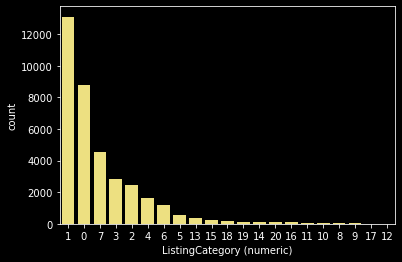

In [47]:
# see distribution of SUCCESSFUL loans on ListingCategory (numeric)
#fig3, ax3 = plt.subplots(3,1, figsize = (15,10))

base_color = sb.color_palette()[9]
sb.countplot(data=successful, x='ListingCategory (numeric)', color=base_color, order=successful['ListingCategory (numeric)'].value_counts().index);

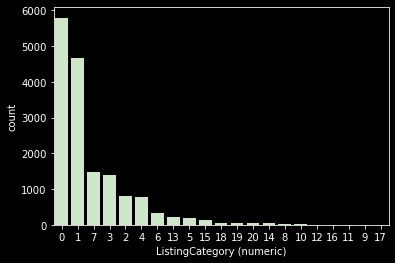

In [48]:
base_color = sb.color_palette()[8]
sb.countplot(data=failed, x='ListingCategory (numeric)', color=base_color, order=failed['ListingCategory (numeric)'].value_counts().index);

> This is the break down of categories. 

>1-Debt Consolidation<br/>
>0-Not Avail. <br/>
>7-other<br/>
>2-Home Improvement<br/>
>3-Business<br/>
>6-Auto<br/>

The category of the listing that the borrower selected when posting their listing: <br/><br/>
*0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement,* <br/>
*3 - Business, 4 - Personal Loan*, 5 - Student Use, <br/>
*6 - Auto, 7- Other*, 8 - Baby&Adoption, 9 - Boat, <br/>
10 - Cosmetic Procedure, 11 - Engagement Ring, <br/>
12 - Green Loans, *13 - Household Expenses*, 14 - Large Purchases, <br/>
*15 - Medical/Dental*, 16 - Motorcycle, 17 - RV, <br/>
*18 - Taxes*, 19 - Vacation, 20 - Wedding Loans <br/>

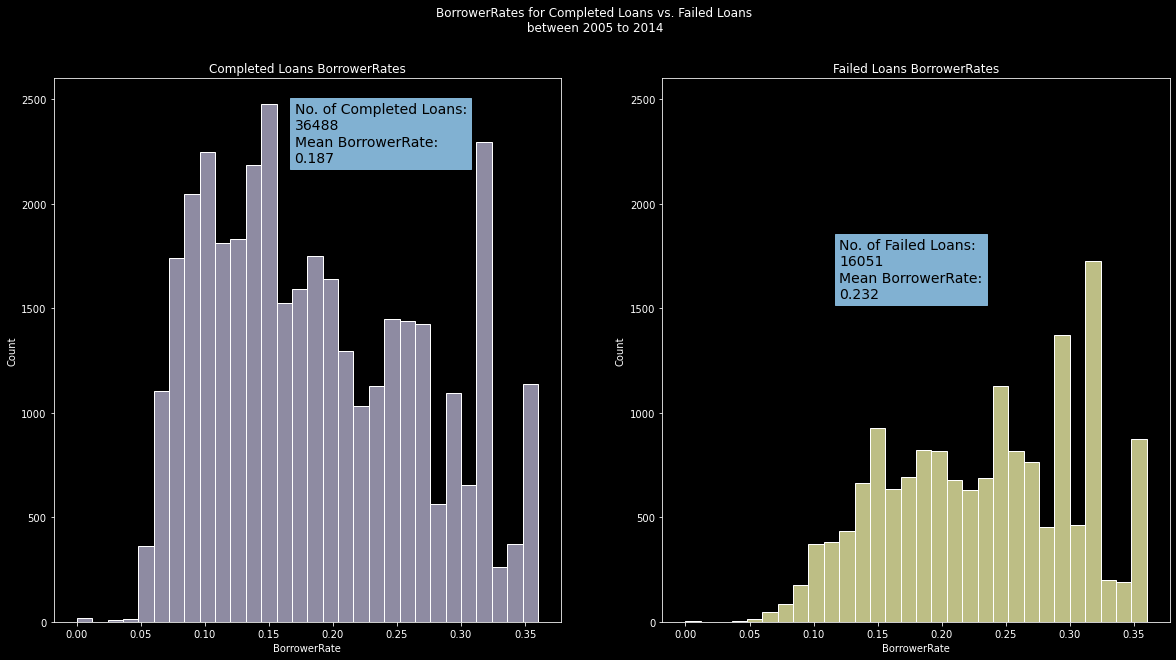

In [49]:
# Compare BorrowerRate's between the Completed loans & the Defaulted & ChargedOff
# would like to stack these but I don't want to single out the "completed" & "failed"
fig, ax = plt.subplots(1,2, figsize = (20,10))
fig.suptitle("BorrowerRates for Completed Loans vs. Failed Loans\n between 2005 to 2014")

style = dict(size=14, color='black', backgroundcolor=sb.color_palette()[4])

completed_no = "No. of Completed Loans:\n" + str(successful.ListingNumber.count()) + "\n"
completed_mean = "Mean BorrowerRate:\n" + str(round(successful.BorrowerRate.mean(),3))

ax[0].set_title("Completed Loans BorrowerRates")
ax[0].text(0.17,2200,completed_no + completed_mean, **style)
#ax[1].annotate(str(Completed.BorrowerRate.mean()),(0.05,3250))
sb.histplot(data=successful, x='BorrowerRate', bins=30, color=sb.color_palette()[2], ax=ax[0]);

failed_no = "No. of Failed Loans:\n" + str(failed.ListingNumber.count()) +  "\n"
failed_mean = "Mean BorrowerRate:\n" + str(round(failed.BorrowerRate.mean(),3))

ax[1].set_title("Failed Loans BorrowerRates")
ax[1].text(0.12,1550,failed_no + failed_mean, **style)
#plt.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='white')
boxf = sb.histplot(data=failed, x='BorrowerRate', bins=30, color=sb.color_palette()[1], ax=ax[1]);
plt.ylim(0,2600);

## Bivariate - BorrowRate & LoanStatus

Comparing the BorrowerRate distribution (& mean) for Failed Loans vs. Completed Loans. 

* There are double the number of completed loans to the number of failed loans. This is a much higher ratio than expected.
* As one might guestimate, the completed loans interest rates are lower vs. the failed loans
* There was nothing surprising that came from this visualization


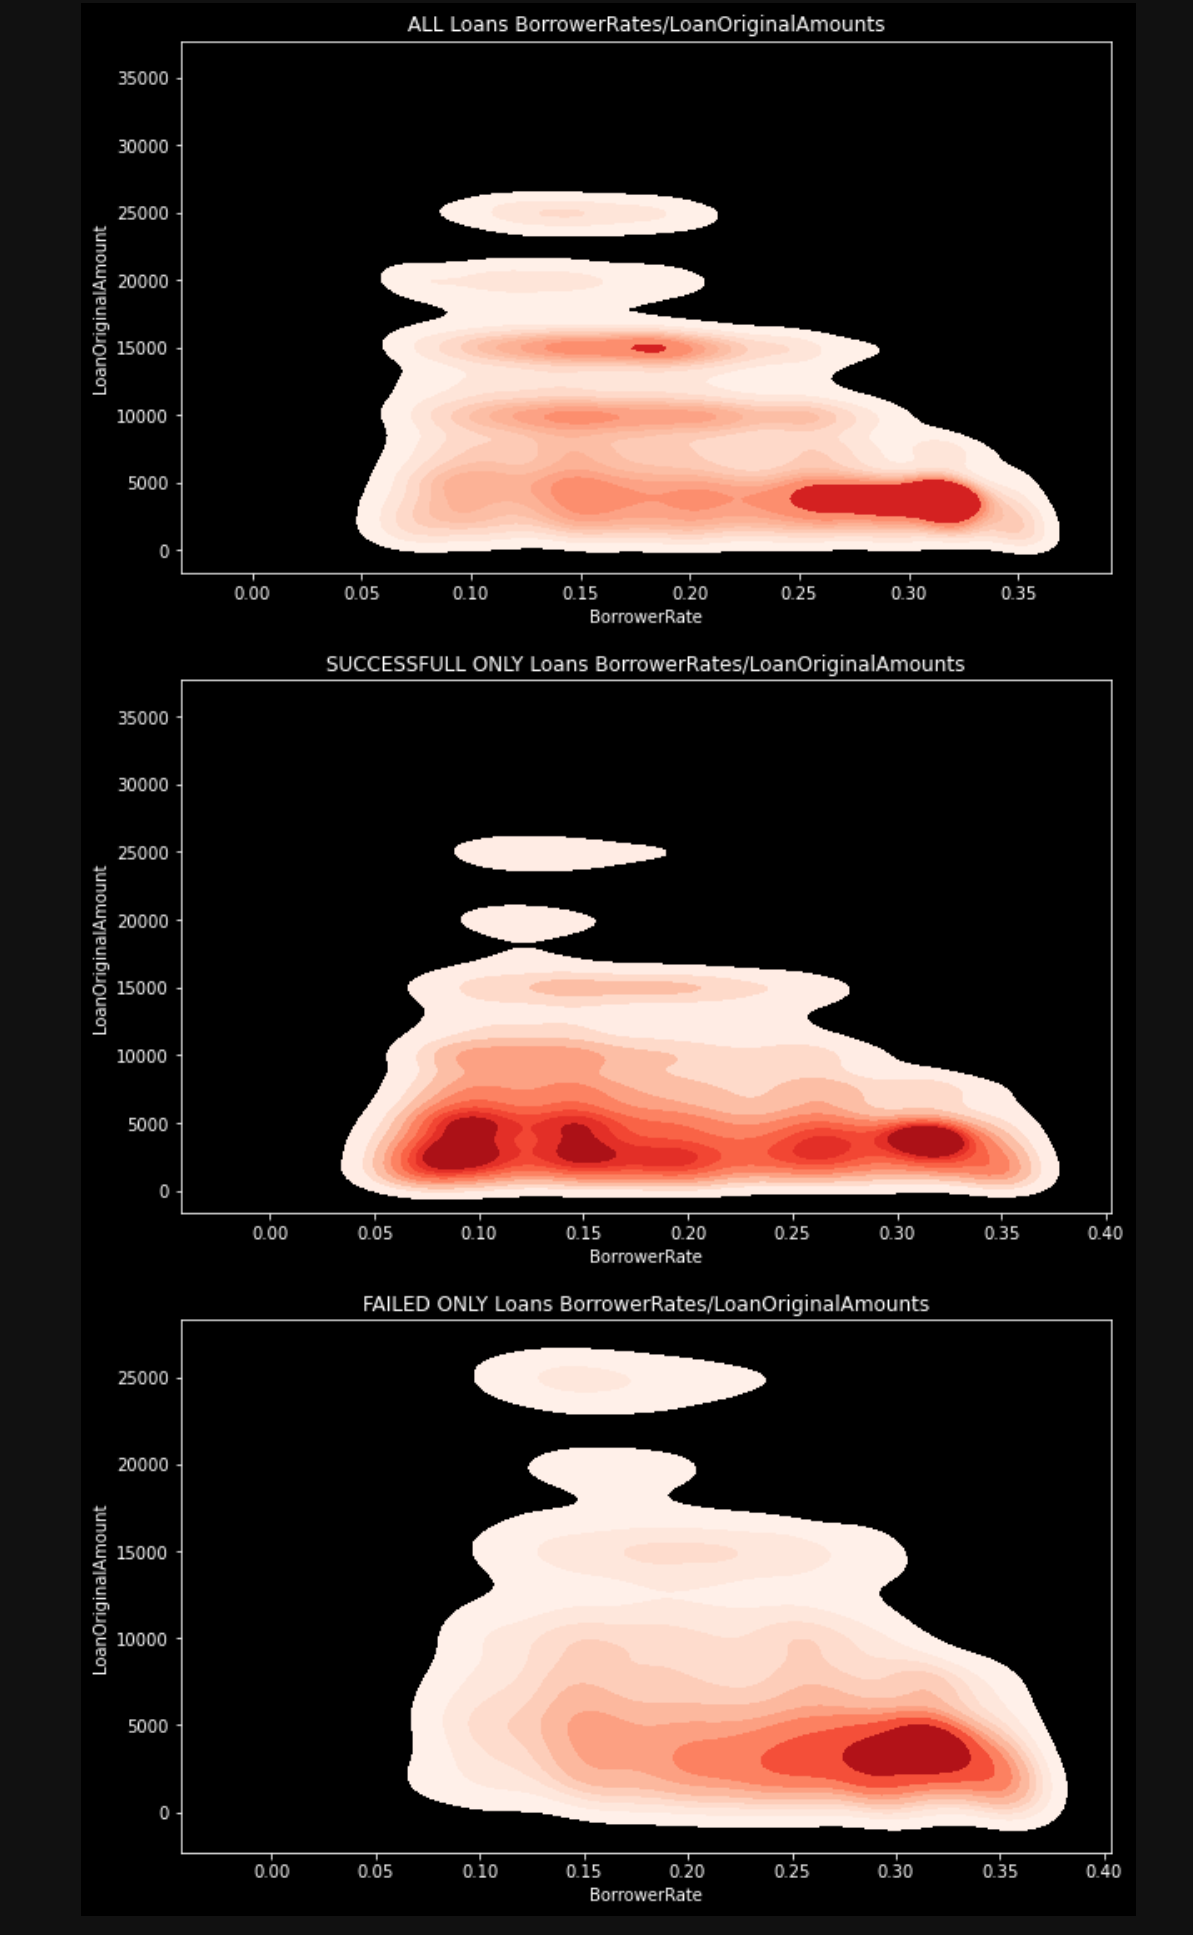

## Multivariate Exploration - Successful vs. Failed loans - LoanOriginalAmount & BorrowerRate
* Fewer than 1% of successful loans are greater than $20,000 in this dataset
* There is a hotspot from 0.25-0.35 BorrowRate for FAILED ONLY

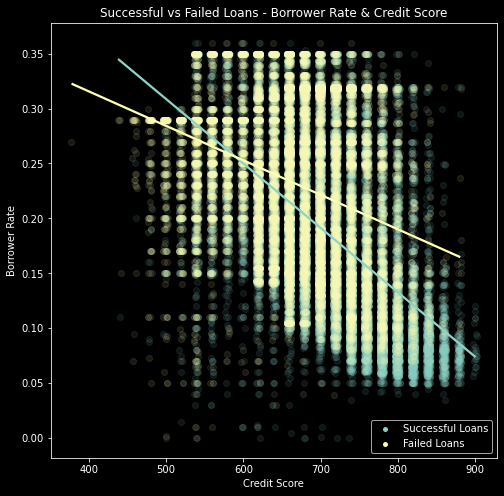

In [50]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# add the plots for each dataframe
rg = sb.regplot(x='CreditScoreRangeUpper', y='BorrowerRate', data=successful, fit_reg=True, ci=None, x_jitter=3, scatter_kws={'alpha':1/10}, ax=ax, label='Successful Loans')
rg2 = sb.regplot(x='CreditScoreRangeUpper', y='BorrowerRate', data=failed, fit_reg=True, ci=None, x_jitter=3, scatter_kws={'alpha':1/10}, ax=ax, label='Failed Loans')

ax.set(ylabel='Borrower Rate', xlabel='Credit Score')
ax.set(title="Successful vs Failed Loans - Borrower Rate & Credit Score")


for r in rg.legend().legendHandles:
    r.set_alpha(1)
    r._sizes = [15]


plt.show()

## Multivariate Scatter plot - Successful vs Failed Loans: BorrowerRate/CreditScore
* Interestingly, the Failed Loans people have a lower BorrowerRate until a CreditScore of ~590
* For people who successfully completed their loans thru Prosper, and have a CreditScore > 590, their BorrowerRate would have been more likely lower
* There appears to be a significant difference between the Successful & Failed loans BorrowerRates from Credit Score > 650

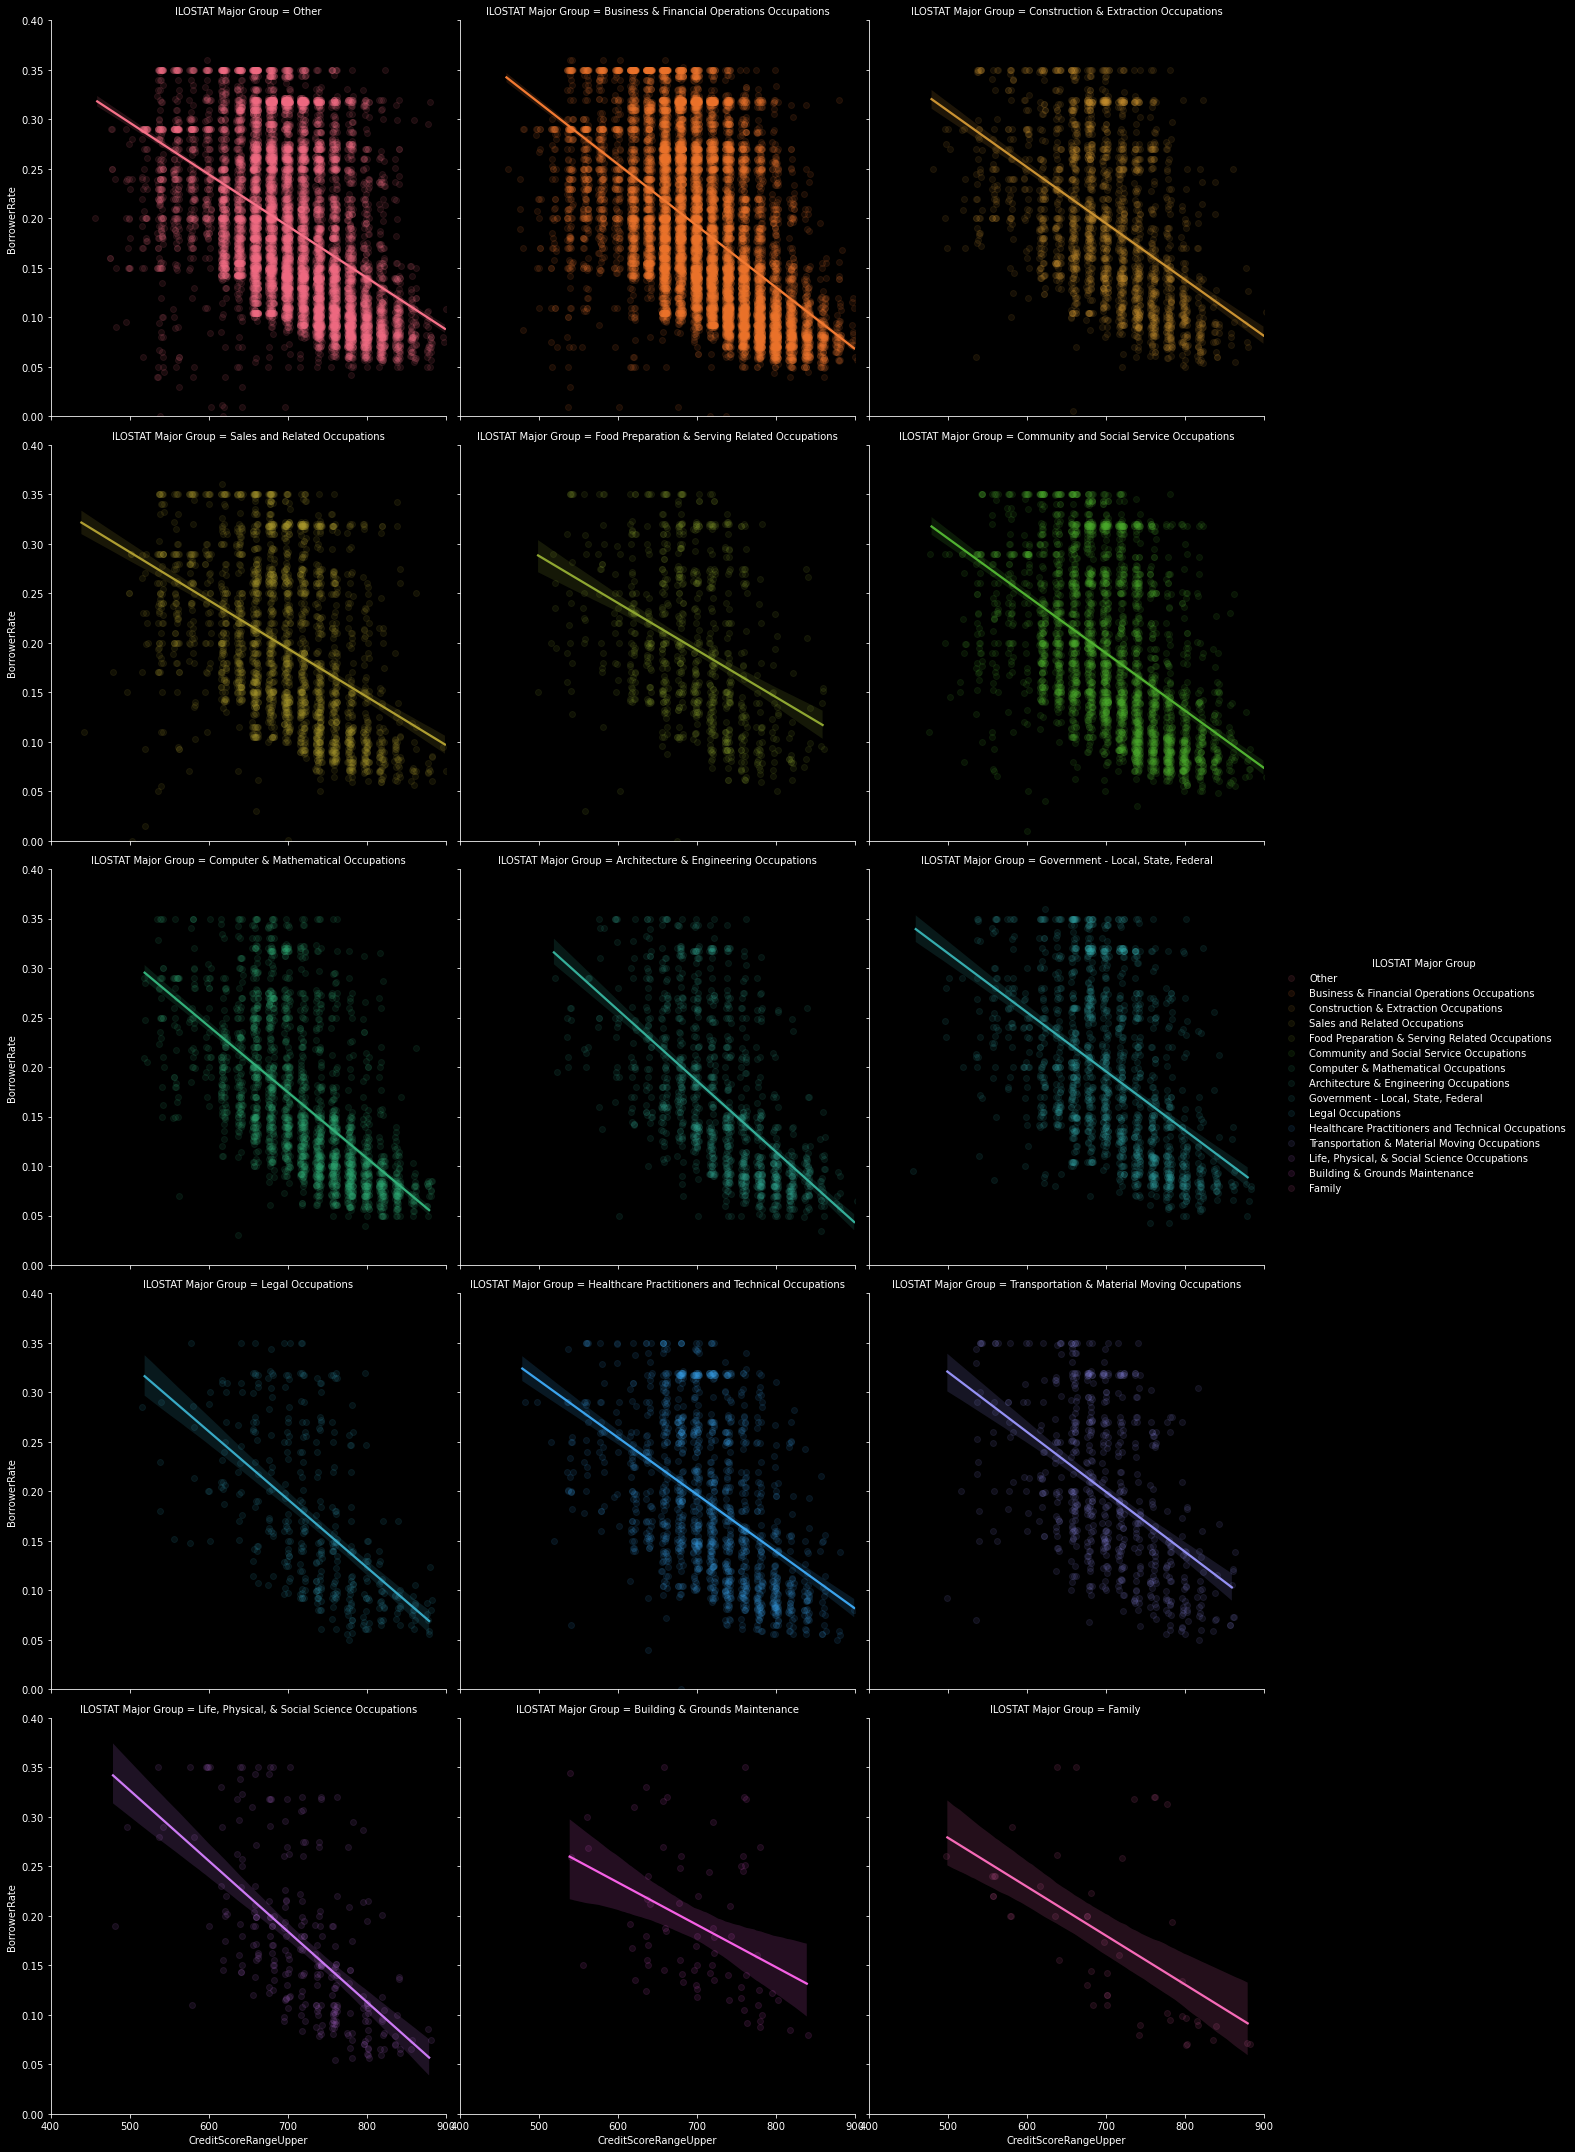

In [51]:
# Scatter plot of Successful Loans by ILOSTAT Occupations
g2 = sb.FacetGrid(data = successful, col = 'ILOSTAT Major Group', hue = 'ILOSTAT Major Group', col_wrap=3, height=6, margin_titles=True);
g2.map(sb.regplot, "CreditScoreRangeUpper", "BorrowerRate", x_jitter=4, scatter_kws={'alpha':1/10});
#g2.title("ALL Loans BorrowerRates/LoanOriginalAmounts")
#plt.title("ILOSTAT Occupations - Compare BorrowerRates/CreditScore")


plt.xlim(400,900)
plt.ylim(0,0.4)
g2.add_legend()

## Multivariate Scatter plot - SUCCESSFUL Loans - CreditScore & BorrowerRate categorized by ILOSTAT Occupation
* 

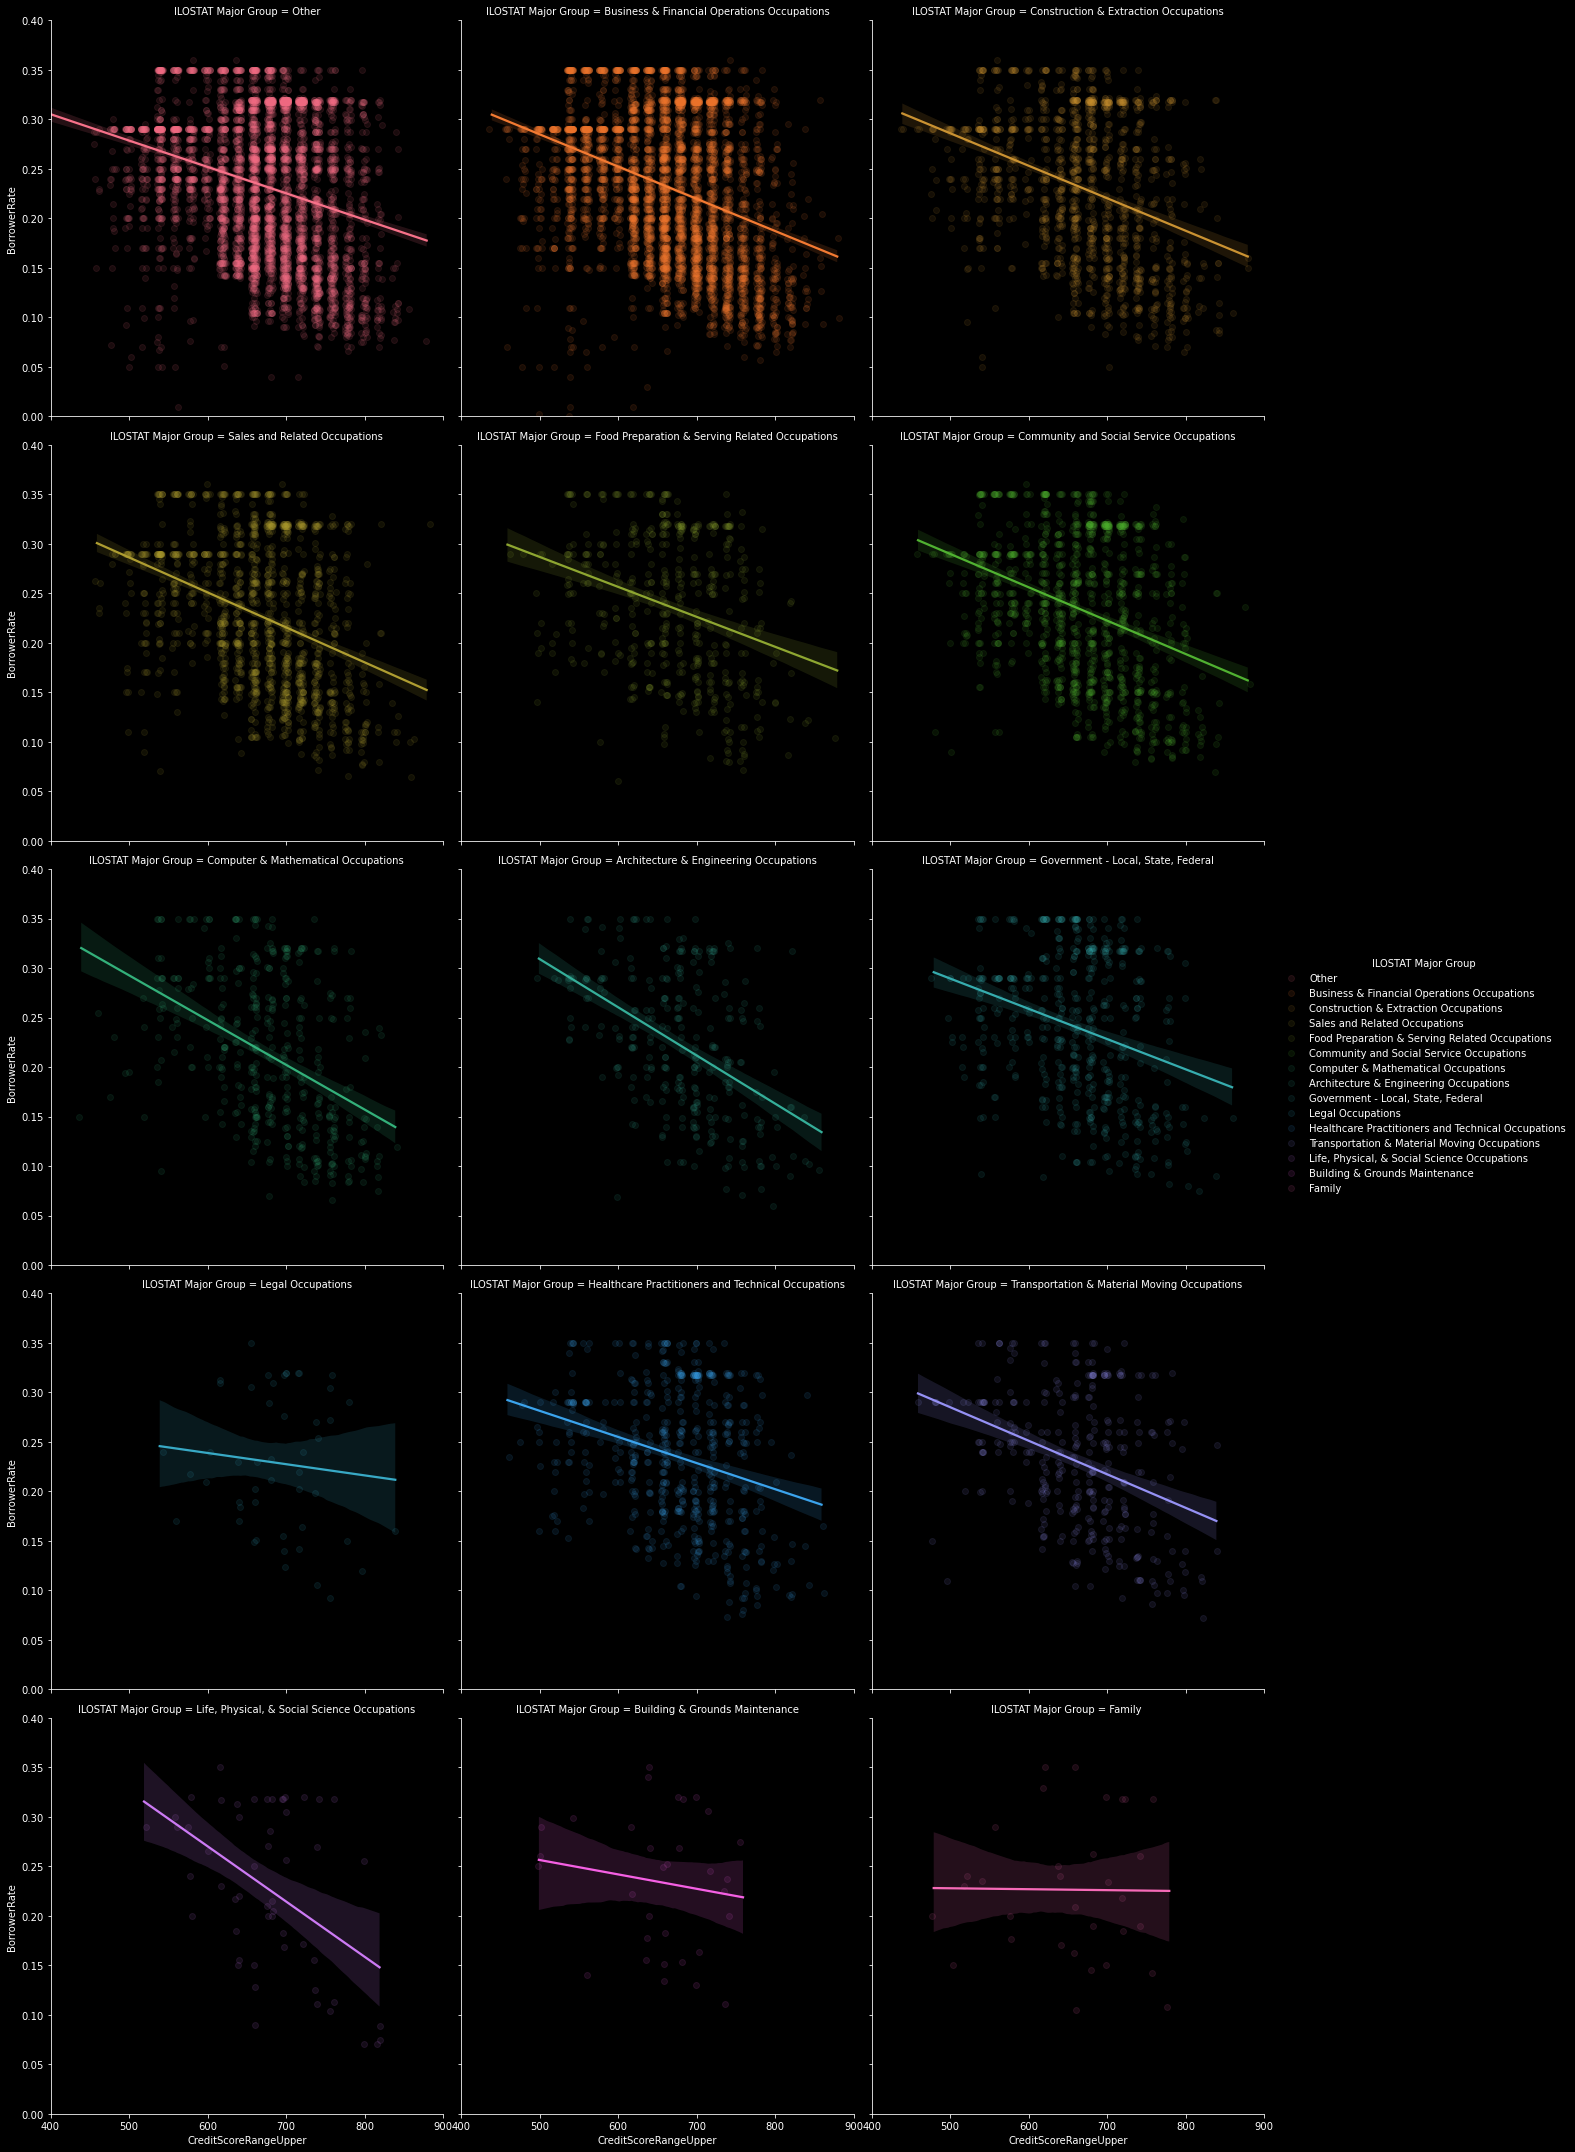

In [52]:
g3 = sb.FacetGrid(data = failed, col = 'ILOSTAT Major Group', hue = 'ILOSTAT Major Group', col_wrap=3, height=6);
g3.map(sb.regplot, "CreditScoreRangeUpper", "BorrowerRate", truncate=True, x_jitter=4, scatter_kws={'alpha':1/10});
plt.xlim(400,900)
plt.ylim(0,0.4)
g3.add_legend()

## Multivariate Scatter plot - FAILED Loans - CreditScore & BorrowerRate categorized by ILOSTAT Occupation
* Besides the number of loans being drastically less, the mid 500s creditscore is the lowest score for which loans are considered for Building & Grounds Maintenance. One might ask what the demographics are of this sub-group.
* The Family category failed loans regression line is FLAT! As the CreditScore increases, the borrowerRate remains consistent 

## Univariate Histogram - LoanStatus by ILOSTAT Occupation
* The majority of failed loans (excluding the 'other' category) are held by 3 occupation types: 
    1. Business & Financial Operations
    2. Construction & Extraction Occupations
    3. Sales & Related Occupations
    followed closely by 
    4. Community & Social Service Occupations
    f

In [53]:
# Trying something different
#, saturation=0.75
# sb.boxplot(x="CreditScoreRangeUpper", y="BorrowerRate", hue="ILOSTAT Major Group", data=successful)

In [54]:
failed.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group Name,ILOSTAT Major Group,Minor Group,successfail
12076,649436,2012-10-04 08:55:47.013,NaN,60,Defaulted,2013-11-14,0.1658,0.1427,0.1327,0.1322,0.0274,0.1048,6.0,A,7.0,7,FL,Other,Retired,142.0,False,False,NaN,2012-10-04 08:55:45.000,760.0,779.0,2000-05-25 00:00:00,5.0,5.0,13.0,4,117.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,2802.0,0.04,53298.0,1.0,0.33,"$1-24,999",True,1666.666667,12.0,7000,2012-10-15,Q4 2012,163.86,1310.88,673.26,637.62,-44.69,0.0,6326.74,6326.74,0.0,1.0,0,0,0.0,148,Other,Other,Other,Failed
19754,496115,2011-02-28 14:56:44.797,NaN,36,Chargedoff,2011-10-17,0.35643,0.3199,0.3099,0.2957,0.147,0.1487,2.0,E,5.0,7,IL,Other,Employed,9.0,True,False,NaN,2011-02-28 14:56:36.000,680.0,699.0,1974-12-11 00:00:00,10.0,10.0,17.0,8,119.0,3.0,4.0,0.0,0.0,15.0,0.0,0.0,3008.0,0.77,886.0,4.0,0.1,"$50,000-74,999",True,5250.0,NaN,5000,2011-03-17,Q1 2011,217.74,435.48,170.31,265.17,-6.68,0.0,4829.69,4829.69,0.0,1.0,0,0,0.0,73,Other,Other,Other,Failed
55256,371221,2008-07-21 20:58:47.593,D,36,Chargedoff,2009-05-31,0.17322,0.1515,0.1315,NaN,NaN,NaN,NaN,NaN,NaN,7,FL,Waiter/Waitress,Full-time,49.0,False,False,NaN,2008-07-21 20:47:26.950,620.0,639.0,2000-05-02 00:00:00,6.0,6.0,12.0,6,92.0,1.0,8.0,0.0,0.0,6.0,0.0,0.0,1754.0,0.0,0.0,0.0,0.35,"$1-24,999",True,1900.0,NaN,6000,2008-07-30,Q3 2008,208.43,1113.49,677.95,435.54,-38.58,-17.0,5322.04,5322.05,0.0,1.0,0,0,0.0,143,Food Prep-Serv,Food Preparation & Serving Related Occupations,Skilled Labor,Failed


In [55]:
failed.loc[failed['

SyntaxError: unterminated string literal (detected at line 1) (3093926087.py, line 1)

In [ ]:
hue='IncomeRange'